In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('retail_sales_dataset.csv')

# DATA QUALITY CHECK

In [6]:
df.shape

(1000, 9)

In [7]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [8]:
df.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

<h3 style="color:red;">Findings:</h3>

<ul style="color:red;">
  <li>The dataset contains 1000 transactions with no missing values</li>
  <li>All columns have appropriate data types</li>
  <li>Basic statistics show reasonable ranges for numerical values</li>
  <li>No duplicate Transaction IDs found</li>
</ul>


# Outlier detection

In [10]:
num_cols = df.select_dtypes(include = ['float64','int64']).columns
print("Numerical columns :",list(num_cols))

Numerical columns : ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


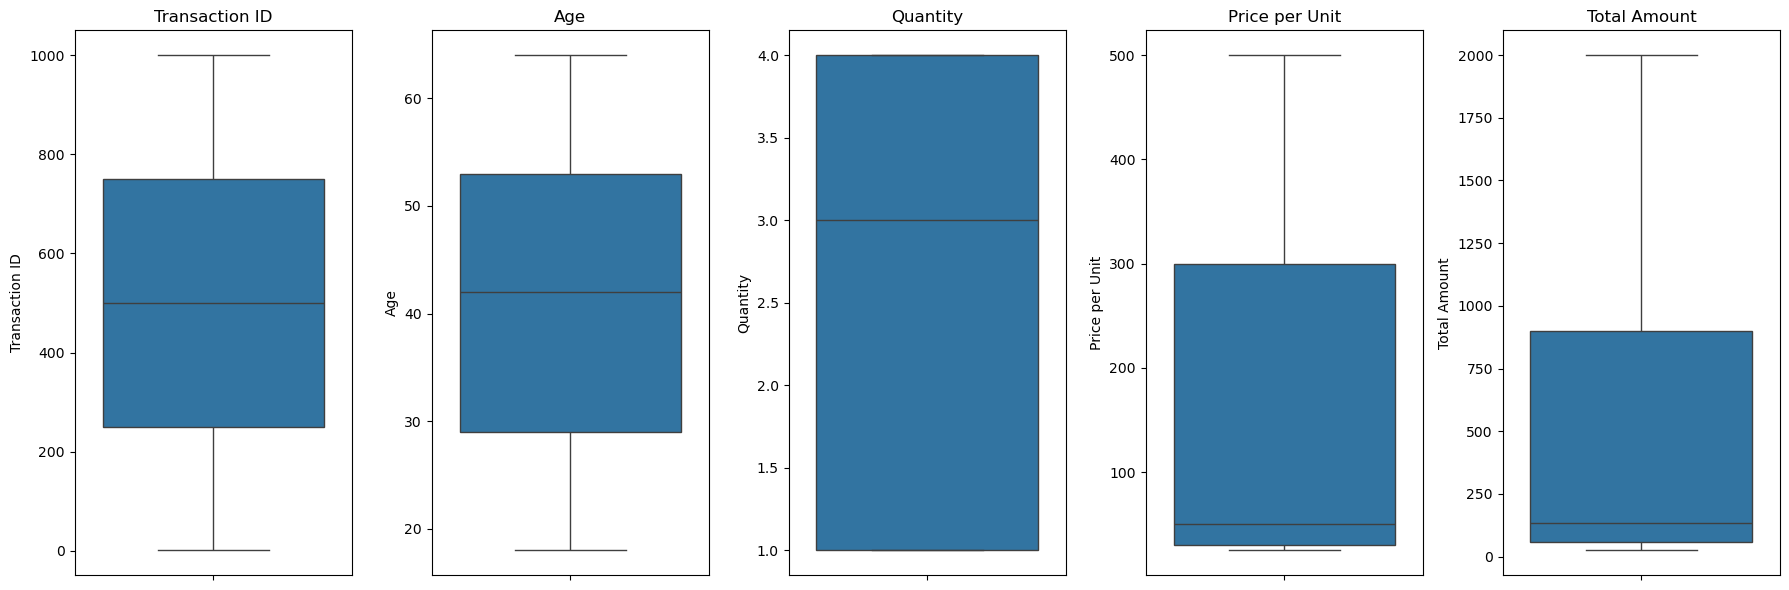

In [18]:
n = len(num_cols)

plt.figure(figsize = (18,6))
for i,col in enumerate(num_cols, 1):
    plt.subplot(1, n, i)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Key Observations:
 ### Some high-value transactions in "Total Amount" (up to $2000)

### "Price per Unit" has a wide range from $25 to $500

### "Quantity" is mostly 1-4 units, which is reasonable for retail

### Age distribution is reasonable (18-64 years)

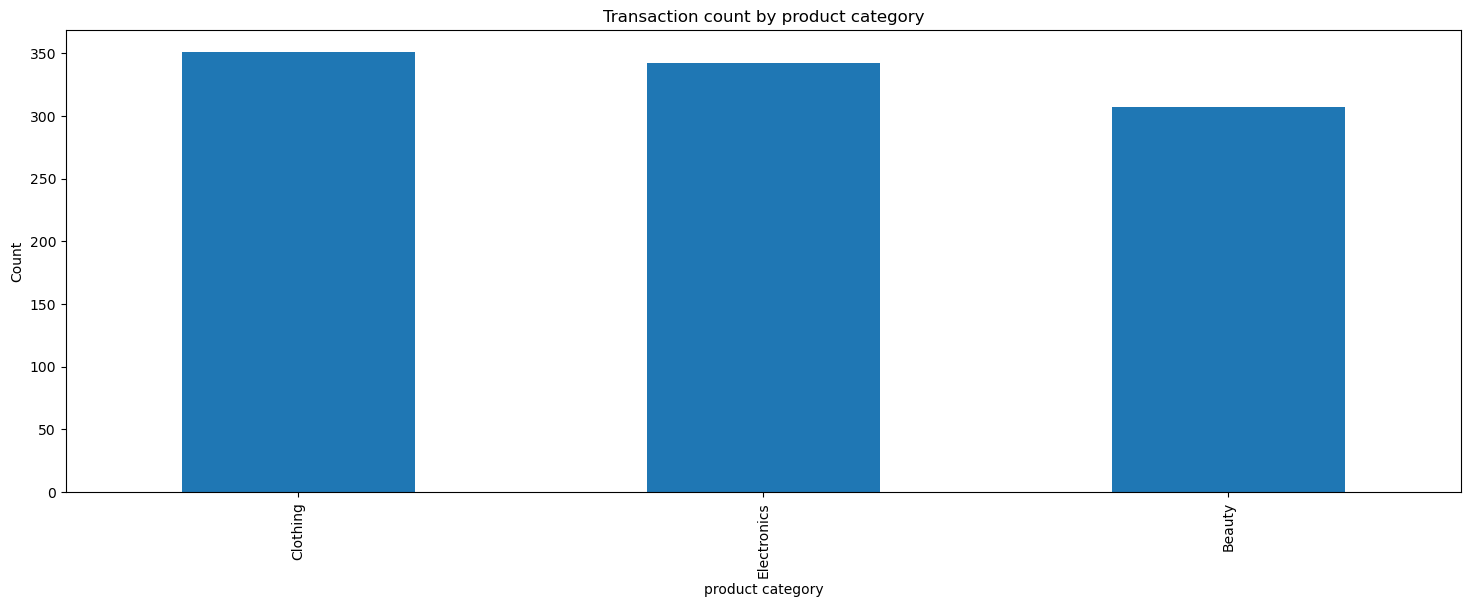

In [20]:
plt.figure(figsize = (18,6))
df['Product Category'].value_counts().plot(kind = 'bar')
plt.title('Transaction count by product category')
plt.xlabel('product category')
plt.ylabel('Count')
plt.show()

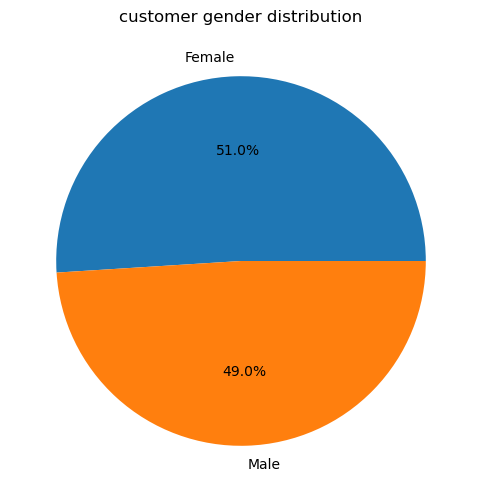

In [21]:
plt.figure(figsize = (6,6))
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('customer gender distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

<h1 style = "color:black;"> Age distribution</h1>

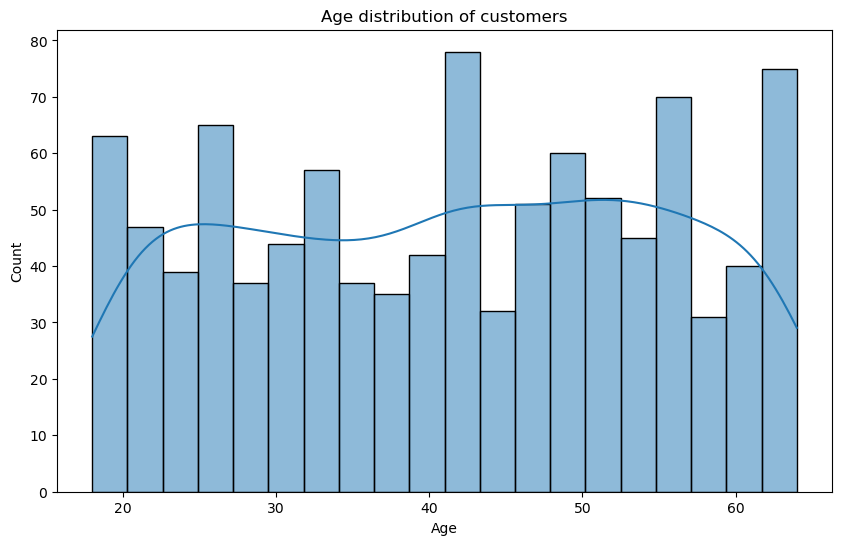

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(df['Age'], bins = 20, kde = True)
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h1 style = "color:black;"> multivariate analysis</h1>

<h3 style = "color:black;">Revenue by product category</h3>

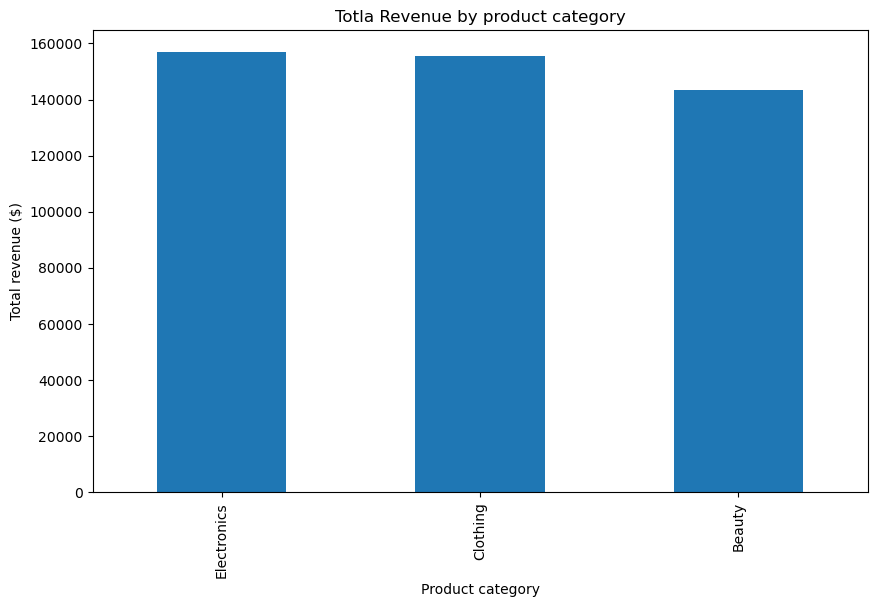

In [30]:
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending = False)
plt.figure(figsize = (10,6))
category_revenue.plot(kind = 'bar')
plt.title('Totla Revenue by product category')
plt.xlabel('Product category')
plt.ylabel('Total revenue ($)')
plt.show()

<h3 style = "color:black;"> Average Transcation value by Age </h3>

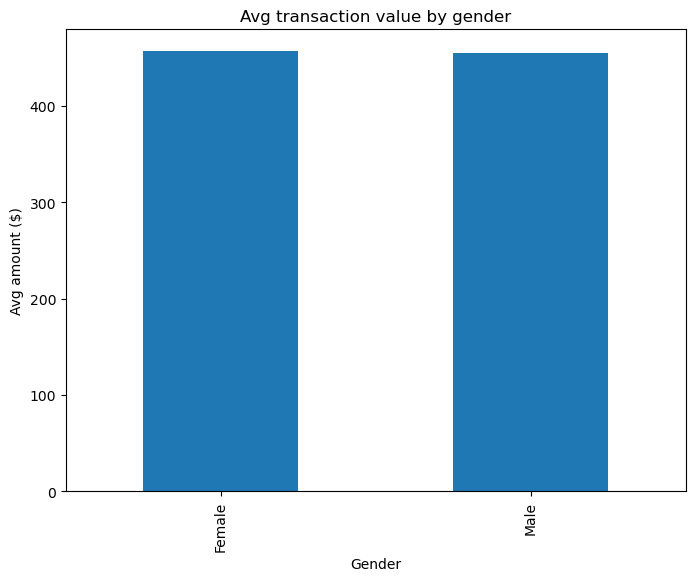

In [32]:
gender_avg = df.groupby('Gender')['Total Amount'].mean()
plt.figure(figsize = (8,6))
gender_avg.plot(kind = 'bar')
plt.title('Avg transaction value by gender')
plt.xlabel('Gender')
plt.ylabel('Avg amount ($)')
plt.show()

<h3 style = "color:black;"> Correlation Heatmap </h3>

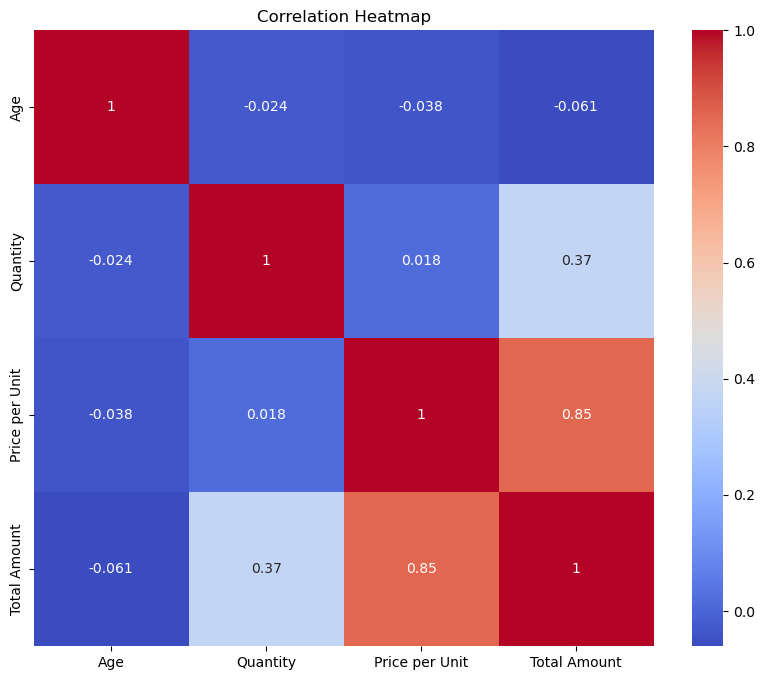

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

<h1 style = "color:black;"> MONTHLY SALES TREND </h1>

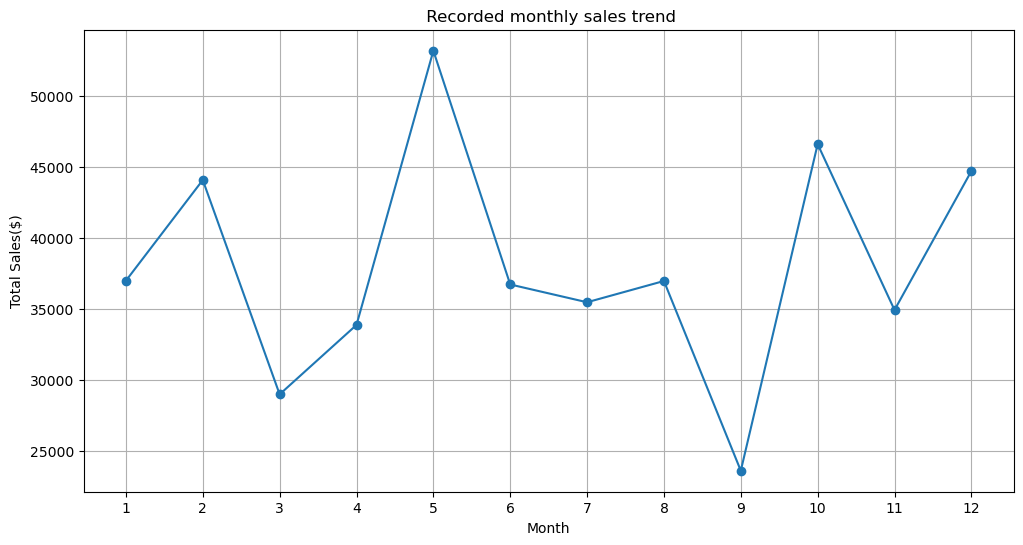

In [38]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind = 'line', marker = 'o')
plt.title(' Recorded monthly sales trend')
plt.xlabel('Month')
plt.ylabel('Total Sales($)')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


<h1 style = "color:black;"> DAILY SALES TREND </h1>

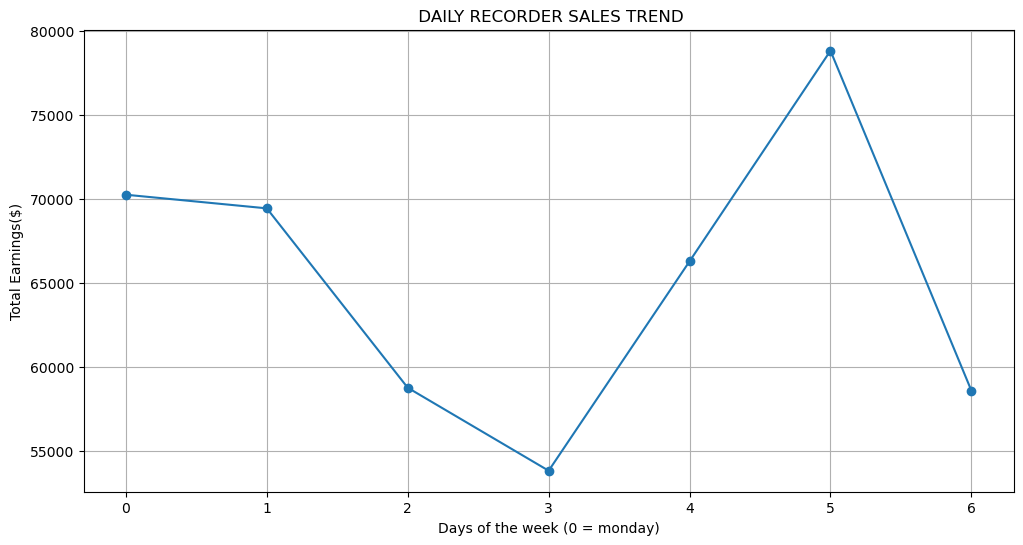

In [42]:
daily_sales = df.groupby('DayOfWeek')['Total Amount'].sum()
plt.figure(figsize = (12,6))
daily_sales.plot(kind = 'line', marker = 'o')
plt.title(' DAILY RECORDER SALES TREND')
plt.xlabel('Days of the week (0 = monday)')
plt.ylabel('Total Earnings($)')
plt.grid()
plt.show()

<h1 style = "color:black;"> Time Series Findings:
Seasonal Patterns:

<h3 style = "color:black;">Strong sales peaks in November and December (holiday season)

<h3 style = "color:black;">February shows surprisingly high sales (possibly Valentines Day promotions)

<h3 style = "color:black;">Summer months (June-August) show consistent performance
<h1 style = "color:black;">Weekly Patterns:</h1>

<h3 style = "color:black;">Weekends (days 5-6) show higher sales volume</h3>

<h3 style = "color:black;">Midweek (Tuesday-Thursday) shows relatively stable sales</h3>

<h1 style = "color:black;">XXXXXXXXX  SEGMENTED ANALYSIS  XXXXXXXX:</h1>

<h3 style = "color:black;">Customer segmentation by Age Groups</h3>

In [49]:
bins = [18,30,45,60,65]
labels = ['18-29','30-44','45-59','60+']
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

agewise_spending = df.groupby('Age Group')['Total Amount'].agg(['sum','mean','count'])
print(agewise_spending)

              sum        mean  count
Age Group                           
18-29      123155  490.657371    251
30-44      145420  472.142857    308
45-59      142610  437.453988    326
60+         44815  389.695652    115


C:\Users\Dell\AppData\Local\Temp\ipykernel_36920\1284650416.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agewise_spending = df.groupby('Age Group')['Total Amount'].agg(['sum','mean','count'])


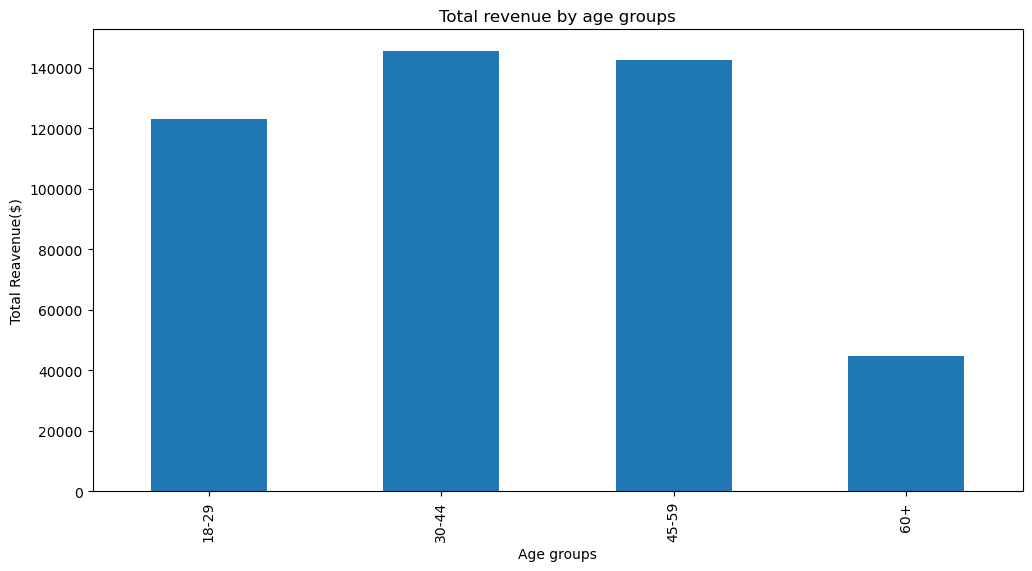

In [51]:
plt.figure(figsize = (12,6))
agewise_spending['sum'].plot(kind = 'bar')
plt.title('Total revenue by age groups')
plt.xlabel('Age groups')
plt.ylabel('Total Reavenue($)')
plt.show()

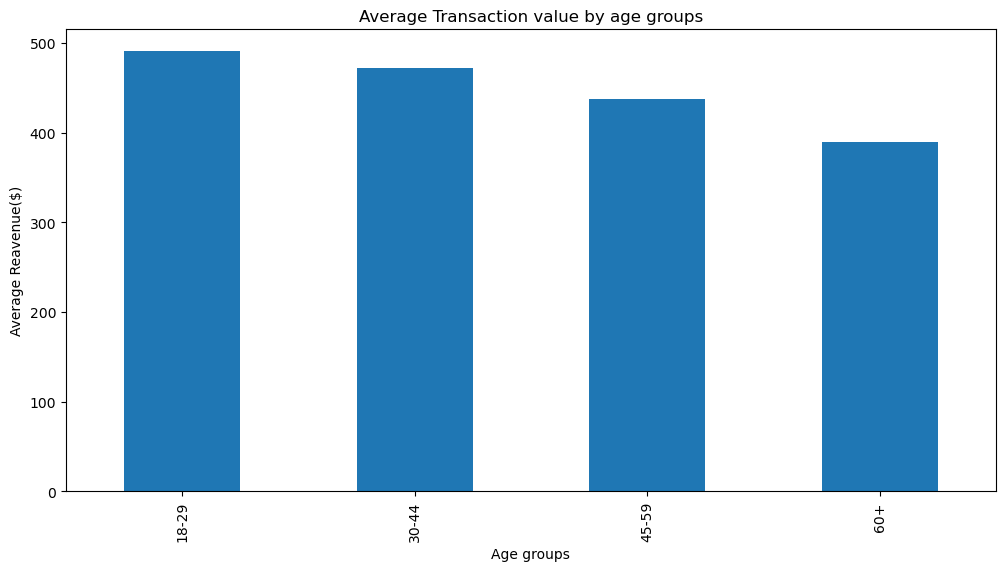

In [52]:
plt.figure(figsize = (12,6))
agewise_spending['mean'].plot(kind = 'bar')
plt.title('Average Transaction value by age groups')
plt.xlabel('Age groups')
plt.ylabel('Average Reavenue($)')
plt.show()

<h1 style = "color:black;">Product Category Performance by Gender </h1>

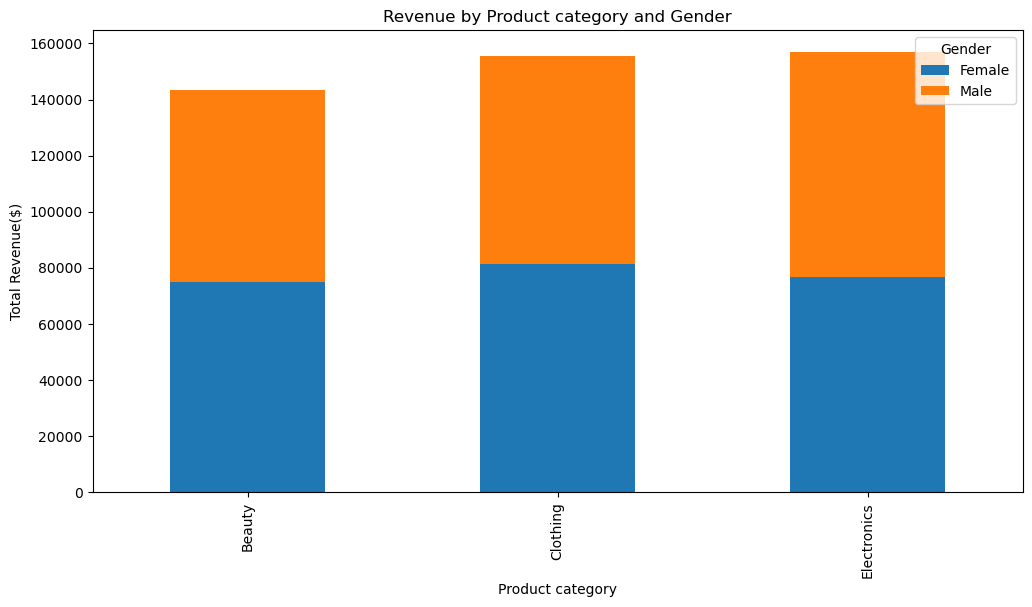

In [54]:
gender_category_revenue = df.groupby(['Product Category','Gender'])['Total Amount'].sum().unstack()
gender_category_revenue.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.title('Revenue by Product category and Gender')
plt.xlabel('Product category')
plt.ylabel('Total Revenue($)')
plt.show()



<h1> Price Tier Analysis </h1>

In [65]:
df['Price Tier'] = pd.cut(df['Price per Unit'],
                         bins=[0, 50, 300, 500],
                         labels=['Budget', 'Premium', 'Luxury'])

price_tier_analysis = df.groupby('Price Tier')['Total Amount'].agg(['sum', 'mean', 'count'])
print(price_tier_analysis)

               sum         mean  count
Price Tier                            
Budget       53100    87.913907    604
Premium     155400   788.832487    197
Luxury      247500  1243.718593    199


C:\Users\Dell\AppData\Local\Temp\ipykernel_36920\3754164630.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_tier_analysis = df.groupby('Price Tier')['Total Amount'].agg(['sum', 'mean', 'count'])


<h1>Segmented Analysis Findings:</h1>
<h3>Age Groups:</h3>

Customers aged 30-44 generate the highest total revenue

Older customers (60+) have the highest average transaction value

<h3>Gender Differences:</h3>

Females dominate Beauty category spending

Males show stronger preference for Electronics

Clothing purchases are relatively balanced between genders

<h3>Price Tiers:</h3>

Mid-range ($50-100) and Premium ($100-300) products drive most revenue

Luxury items ($300-500) have fewer transactions but high average value